In [32]:
!pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


RNN: LSTM Deep Learning Model

In [1]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('lahore_aqi_data.csv')
df=pd.DataFrame(df)

In [56]:
df.head()

,timestamp,aqius,main_pollutant,temperature,humidity,wind_speed,aqi,pm2_5,pm10,no2,so2,co,no,o3,nh3
0,2025-07-04T16:29:03.790679,159,p2,35,49,2.39,53.88,76.52,19.32,3.19,775.09,0.0,78.05,39.08,NaN
1,2025-07-04T16:31:47.019312,159,p2,35,49,2.39,53.62,75.62,18.81,2.88,795.15,0.0,66.64,35.78,NaN
2,2025-07-04T16:40:15.156636,159,p2,35,49,2.39,53.62,75.62,18.81,2.88,795.15,0.0,66.64,35.78,NaN
3,2025-07-04T16:51:12.690482,159,p2,35,49,2.39,53.62,75.62,18.81,2.88,795.15,0.0,66.64,35.78,NaN
4,2025-07-04T17:18:25.444564,160,p2,35,51,3.14,53.62,75.62,18.81,2.88,795.15,0.0,66.64,35.78,NaN


In [44]:
df.shape

(2999, 15)

In [45]:
df.tail()

,timestamp,aqius,main_pollutant,temperature,humidity,wind_speed,aqi,pm2_5,pm10,no2,so2,co,no,o3,nh3
2994,2025-11-16T14:18:16.527889,197,p2,23,33,0.00,137.55,219.04,15.89,9.10,850.74,0.0,99.43,34.64,NaN
2995,2025-11-16T15:19:07.415307,219,p2,21,37,2.06,146.96,233.02,17.38,9.41,930.87,0.0,94.99,39.77,NaN
2996,2025-11-16T16:23:30.389387,237,p2,20,43,0.00,153.63,241.96,17.89,9.34,986.90,0.0,89.56,43.76,NaN
2997,2025-11-16T17:17:20.258720,251,p2,19,49,1.03,162.42,253.84,18.33,9.28,1048.47,0.0,85.26,48.41,NaN
2998,2025-11-16T18:27:48.068669,252,p2,18,55,0.00,171.23,264.53,18.49,9.10,1100.62,0.0,81.29,52.48,NaN


In [46]:
df.isnull().sum()

timestamp            0
aqius                0
main_pollutant       0
temperature          0
humidity             0
wind_speed           0
aqi                  0
pm2_5                0
pm10                 0
no2                  0
so2                  0
co                   0
no                   0
o3                   0
nh3               2999
dtype: int64

Data Analysis

In [57]:
df=df.drop(['nh3'],axis=1)

In [58]:
df=df.drop(['main_pollutant'],axis=1)

In [49]:
df.isnull().sum()

timestamp      0
aqius          0
temperature    0
humidity       0
wind_speed     0
aqi            0
pm2_5          0
pm10           0
no2            0
so2            0
co             0
no             0
o3             0
dtype: int64

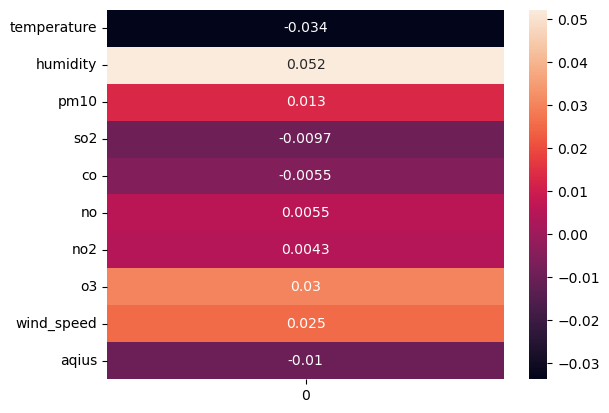

In [15]:
X=df[['temperature','humidity','pm10','so2','co','no','no2','o3','wind_speed','aqius',]]
y=X.corrwith(df['pm2_5'])
y=y.to_frame()
sns.heatmap(y,annot=True)
plt.show()


Feature Scaling

In [60]:
scale=MinMaxScaler()
X=scale.fit_transform(X)
target=df['pm2_5'].values

Feature Engineering

In [64]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['day']=df['timestamp'].dt.day
df['month']=df['timestamp'].dt.month
df['year']=df['timestamp'].dt.year
df['date']=df['timestamp'].dt.dayofweek
df.drop('timestamp',axis=1,inplace=True)

In [62]:
df=df.drop(['aqi'],axis=1)

In [63]:
df.head()

,timestamp,aqius,temperature,humidity,wind_speed,pm2_5,pm10,no2,so2,co,no,o3
0,2025-07-04T16:29:03.790679,159,35,49,2.39,76.52,19.32,3.19,775.09,0.0,78.05,39.08
1,2025-07-04T16:31:47.019312,159,35,49,2.39,75.62,18.81,2.88,795.15,0.0,66.64,35.78
2,2025-07-04T16:40:15.156636,159,35,49,2.39,75.62,18.81,2.88,795.15,0.0,66.64,35.78
3,2025-07-04T16:51:12.690482,159,35,49,2.39,75.62,18.81,2.88,795.15,0.0,66.64,35.78
4,2025-07-04T17:18:25.444564,160,35,51,3.14,75.62,18.81,2.88,795.15,0.0,66.64,35.78


Rolling window of mean of 3 for pm2.5  

In [ ]:
# df['rolling_avg']=df['pm2_5'].rolling(window=24).mean()

In [66]:
window=24
def create_sequences(data,target,window):
    X,y=[],[]
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(target[i+window])
    return np.array(X),np.array(y)


In [67]:
window=24

X,y=create_sequences(X,target,window)

In [27]:
df.dropna(inplace=True)

In [68]:
X_train, y_train = X[:-72], y[:-72]
X_test, y_test = X[-72:], y[-72:]


In [69]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2903, 24, 10) (2903,)
(72, 24, 10) (72,)


Building a Deep Learning LSTM Model

In [70]:
model=Sequential([
    LSTM(50,activation='tanh',input_shape=(window,X.shape[2])),
    Dense(32,activation='tanh'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),loss='mse')

c:\Users\mehno\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
earlystop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [72]:
model.fit(X_train,y_train,epochs=20,batch_size=16,validation_split=0.2,callbacks=[earlystop])

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 516692436813476085628928.0000 - val_loss: 27960.8770
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 516692508871070123556864.0000 - val_loss: 30131.6738
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 516692508871070123556864.0000 - val_loss: 30772.2676
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 516692508871070123556864.0000 - val_loss: 31345.2285
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 516692508871070123556864.0000 - val_loss: 31823.2832
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 516692508871070123556864.0000 - val_loss: 32350.9395


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


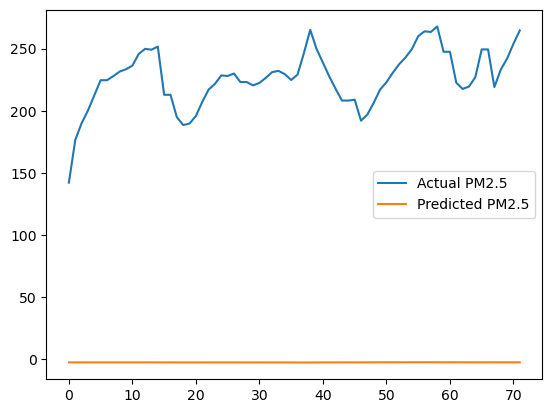

In [74]:
predictions=model.predict(X_test)
plt.plot(y_test,label='Actual PM2.5')
plt.plot(predictions,label='Predicted PM2.5')
plt.legend()
plt.show()

Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
df = pd.read_csv("lahore_aqi_data.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['date']=df['timestamp'].dt.date
df.drop(['nh3'],axis=1,inplace=True)
df.drop(['main_pollutant'],axis=1,inplace=True)

In [35]:
df.head()

,timestamp,aqius,temperature,humidity,wind_speed,aqi,pm2_5,pm10,no2,so2,co,no,o3,day,month,date
0,2025-07-04 16:29:03.790679,159,35,49,2.39,53.88,0.063383,19.32,3.19,775.09,0.0,78.05,39.08,4,7,2025-07-04
9,2025-07-04 22:20:13.406734,167,33,58,3.57,53.40,0.063383,8.37,4.35,653.48,0.0,83.58,23.05,4,7,2025-07-04
8,2025-07-04 21:20:03.882628,170,33,58,3.38,51.27,0.063383,9.48,4.09,658.16,0.0,83.60,23.92,4,7,2025-07-04
7,2025-07-04 20:22:24.451321,172,33,57,3.50,48.97,0.063383,10.82,3.63,662.49,0.0,82.01,24.37,4,7,2025-07-04
6,2025-07-04 19:17:30.046877,171,34,52,3.51,48.60,0.063383,13.01,3.04,693.30,0.0,76.43,26.40,4,7,2025-07-04


In [32]:
#sort data by date
df=df.sort_values(by='date')

In [33]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

df['pm2_5']=scalar.fit_transform(df[['pm2_5']])

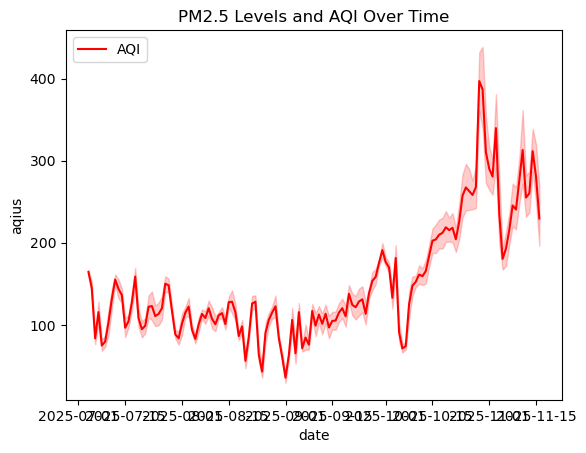

In [29]:
# sns.lineplot(data=df, x='date', y='pm2_5', label='PM2.5 Levels', color='blue')
sns.lineplot(data=df, x='date', y='aqius', label='AQI',color='red')
plt.title('PM2.5 Levels and AQI Over Time')
plt.legend()
plt.show()


In [37]:
print(df['pm2_5'].head(10))

0     0.063383
9     0.063383
8     0.063383
7     0.063383
6     0.063383
10    0.063383
4     0.063383
3     0.063383
2     0.063383
1     0.063383
Name: pm2_5, dtype: float64


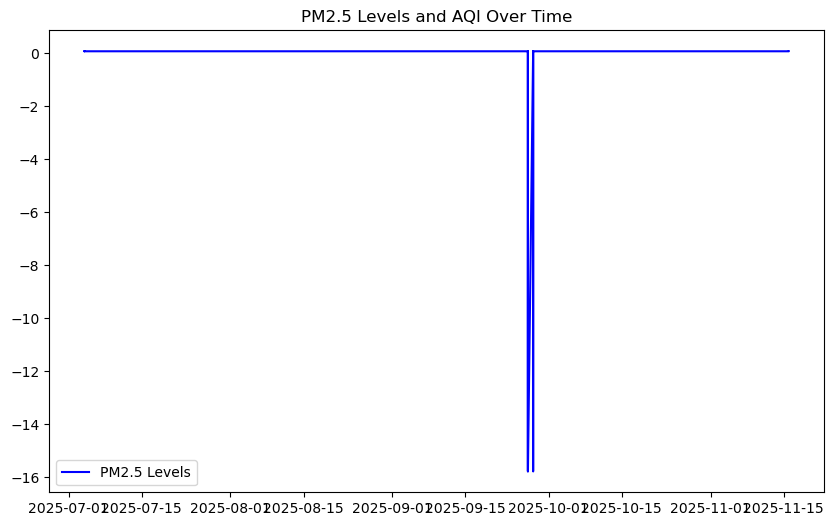

In [28]:
plt.figure(figsize=(10,6))
plt.plot(df['date'],df['pm2_5'],label='PM2.5 Levels', color='blue')
# plt.plot(df['date'],df['aqius'],label='AQI Level',color='red')
plt.title('PM2.5 Levels and AQI Over Time')
plt.legend()
plt.show()

LSTM 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load
df = pd.read_csv("lahore_aqi_data.csv")

# Convert timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["dow"] = df["timestamp"].dt.dayofweek
df.drop("timestamp", axis=1, inplace=True)
df.drop(['nh3','main_pollutant','aqi'],axis=1,inplace=True)

# Target
target = df["pm2_5"].values

# Features
features = df.drop("pm2_5", axis=1).values

# Scale features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [3]:
def create_seq(features, target, window=24):
    X, y = [], []
    for i in range(len(target) - window):
        X.append(features[i:i+window])
        y.append(target[i+window])
    return np.array(X), np.array(y)

window = 24
X, y = create_seq(features_scaled, target, window)


In [4]:
X_train, y_train = X[:-72], y[:-72]
X_test, y_test = X[-72:], y[-72:]


 X.shape[0] → number of samples

 X.shape[1] → window / timesteps (24)
 
 X.shape[2] → number of features per timestep

In [39]:
model = Sequential([
    LSTM(64, activation='tanh',return_sequences=False, input_shape=(window, X_train.shape[2])),
    Dense(32, activation='tanh'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


c:\Users\mehno\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early]
)

Epoch 1/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 516692508871070123556864.0000 - val_loss: 29666.8184
Epoch 2/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 516692508871070123556864.0000 - val_loss: 30284.6953
Epoch 3/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 516692508871070123556864.0000 - val_loss: 30798.5371
Epoch 4/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 516692436813476085628928.0000 - val_loss: 31275.3457
Epoch 5/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 516692508871070123556864.0000 - val_loss: 31759.5801
Epoch 6/25
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 516692508871070123556864.0000 - val_loss: 32263.1523


In [40]:
R2_score = model.evaluate(X_test, y_test)
print("R2 Score on Test Data:", R2_score)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 51671.1523
R2 Score on Test Data: 51671.15234375


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 827ms/step


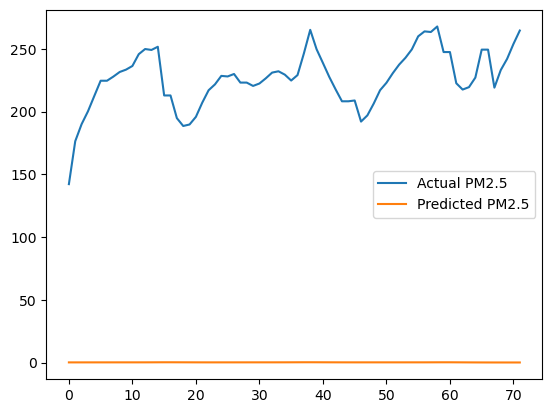

In [41]:
pred = model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(y_test, label="Actual PM2.5")
plt.plot(pred, label="Predicted PM2.5")
plt.legend()
plt.show()